In [815]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve



In [816]:
personality = pd.read_csv(r"C:\Users\TIFF\Documents\Introvert vs Extrovert Project\personality_dataset.csv")

In [817]:
personality.head(10)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
5,1.0,No,7.0,5.0,No,6.0,6.0,Extrovert
6,4.0,No,9.0,NaN,No,7.0,7.0,Extrovert
7,2.0,No,8.0,4.0,No,7.0,8.0,Extrovert
8,10.0,Yes,1.0,3.0,Yes,0.0,3.0,Introvert
9,0.0,No,8.0,6.0,No,13.0,8.0,Extrovert


In [818]:
### list of columns

personality.columns.tolist()

['Time_spent_Alone',
 'Stage_fear',
 'Social_event_attendance',
 'Going_outside',
 'Drained_after_socializing',
 'Friends_circle_size',
 'Post_frequency',
 'Personality']

Check for missing values per column.

In [819]:
personality.isnull().sum()

Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64



Impute missing numerical values with the mean, and categorical with mode.


In [820]:
### fill numerical values with mean
personality.fillna(personality.select_dtypes(include="number").mean(),inplace=True)

In [821]:
### fill categorical columns with mode 
for col in personality.select_dtypes(include="object"):
    personality[col].fillna(personality[col].mode()[0], inplace=True)


C:\Users\TIFF\AppData\Local\Temp\ipykernel_2124\2027341253.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  personality[col].fillna(personality[col].mode()[0], inplace=True)


Convert categorical columns like gender to proper data types

In [822]:
# Convert object columns to category type
for col in personality.select_dtypes(include='object').columns:
    personality[col] = personality[col].astype('category')


Identify and drop duplicate rows.


In [823]:
duplicate_check = personality.duplicated().sum()
print(f" Number of duplicate rows {duplicate_check}")

 Number of duplicate rows 402


In [824]:
personality.drop_duplicates(inplace=True)

Use boxplots to find outliers in any numerical column.

<function matplotlib.pyplot.show(close=None, block=None)>

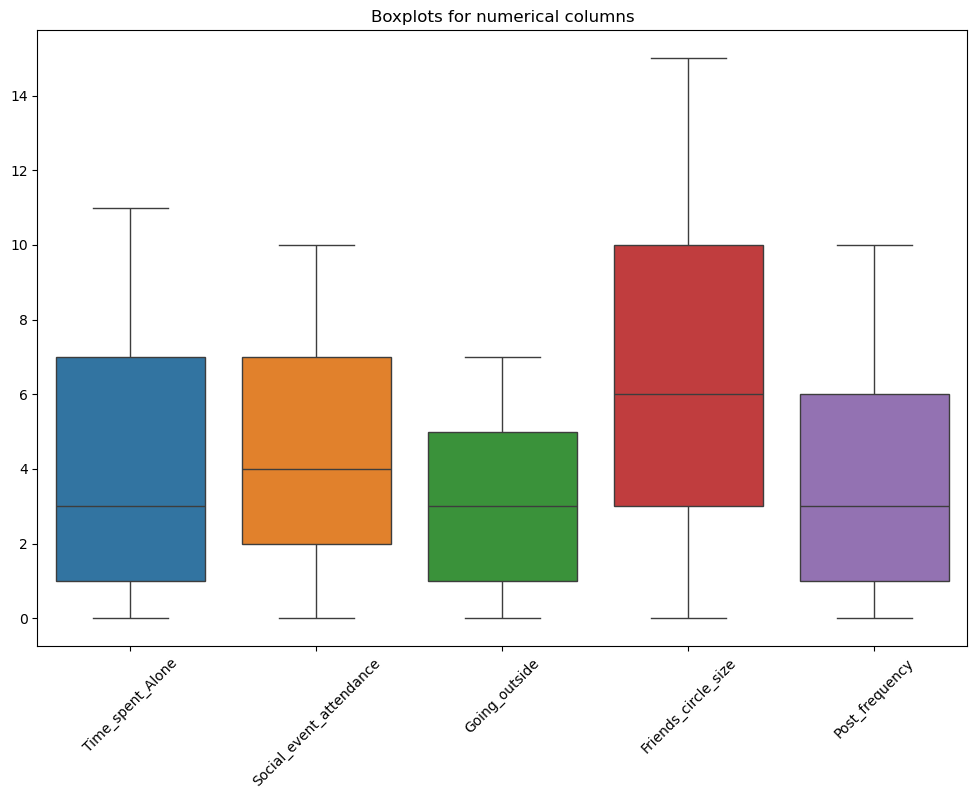

In [825]:
plt.figure(figsize=(12,8))
sns.boxplot(data=personality.select_dtypes(include="number"))
plt.title("Boxplots for numerical columns")
plt.xticks(rotation=45)
plt.savefig("Boxplot_for_numerical_features")
plt.show

Remove rows beyond 3 standard deviations from the mean.

In [826]:
# Calculate Z-scores for all numerical columns
z_scores = np.abs(stats.zscore(personality.select_dtypes(include='number')))

# Create a boolean mask: True = row is within 3 std devs for all numeric cols
filtered_entries = (z_scores < 3).all(axis=1)

# Apply the mask to filter the DataFrame
personality = personality[filtered_entries]

In [827]:
# Reset index and drop the old index
personality.reset_index(drop=True, inplace=True)


Section 2: Exploratory Data Analysis (EDA) & Visualizations (9 questions)

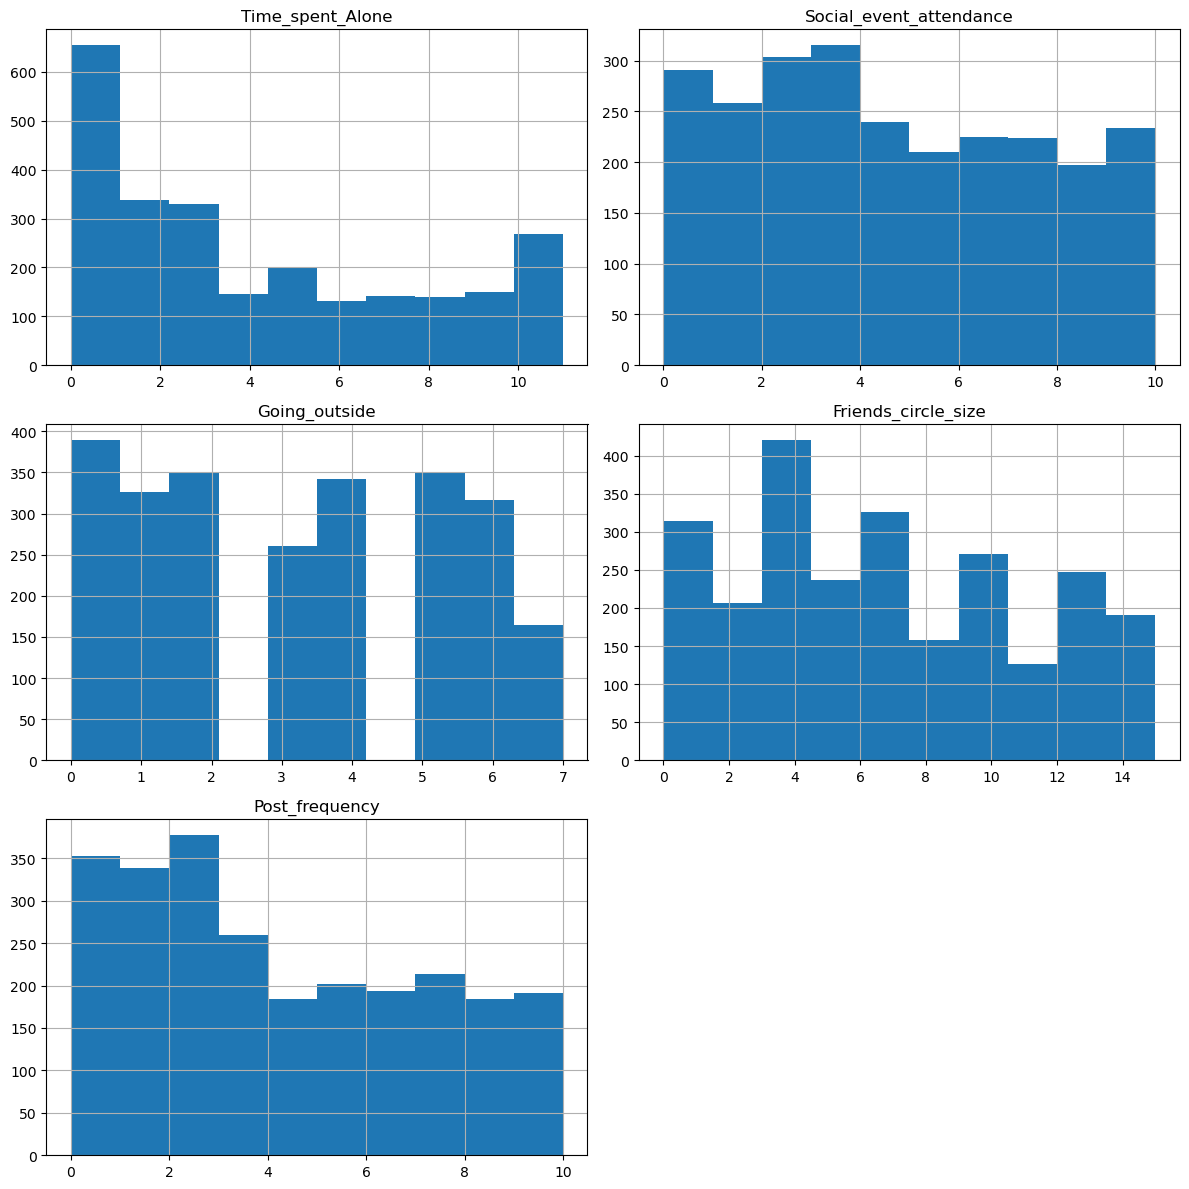

In [828]:
### histogram of numerical features
numeric_cols = personality.select_dtypes(include="number")
numeric_cols.hist(figsize=(12,12))
plt.title(" Distribution of numeric features")
plt.tight_layout()
plt.savefig(" Histogram: Distribution of numeric feautures")
plt.show()

Create a bar chart showing count per personality type.

In [829]:
personality.columns.tolist()

['Time_spent_Alone',
 'Stage_fear',
 'Social_event_attendance',
 'Going_outside',
 'Drained_after_socializing',
 'Friends_circle_size',
 'Post_frequency',
 'Personality']

C:\Users\TIFF\AppData\Local\Temp\ipykernel_2124\2894454864.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=personality, x="Personality", palette="muted")


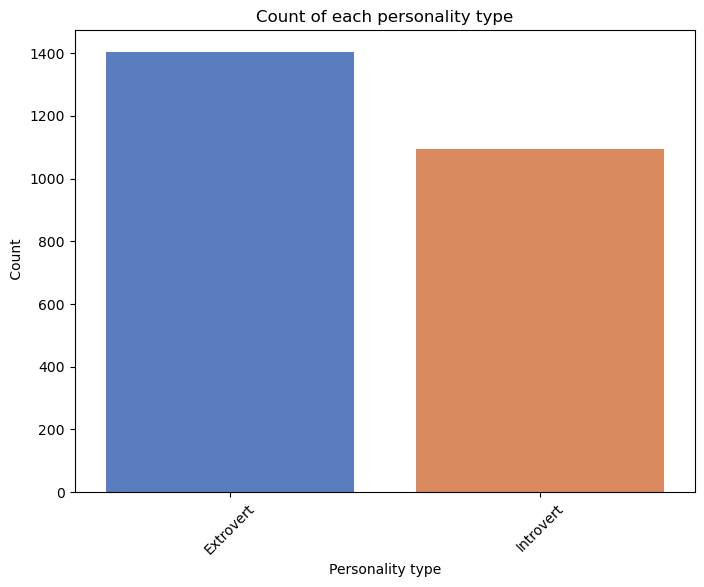

In [830]:
plt.figure(figsize=(8,6))
sns.countplot(data=personality, x="Personality", palette="muted")
plt.title("Count of each personality type")
plt.xlabel("Personality type")
plt.ylabel(" Count")
plt.xticks(rotation=45)
plt.savefig(" Barchart showing Personality type")
plt.show()


Use seaborn.pairplot() to visualize feature relationships by personality.

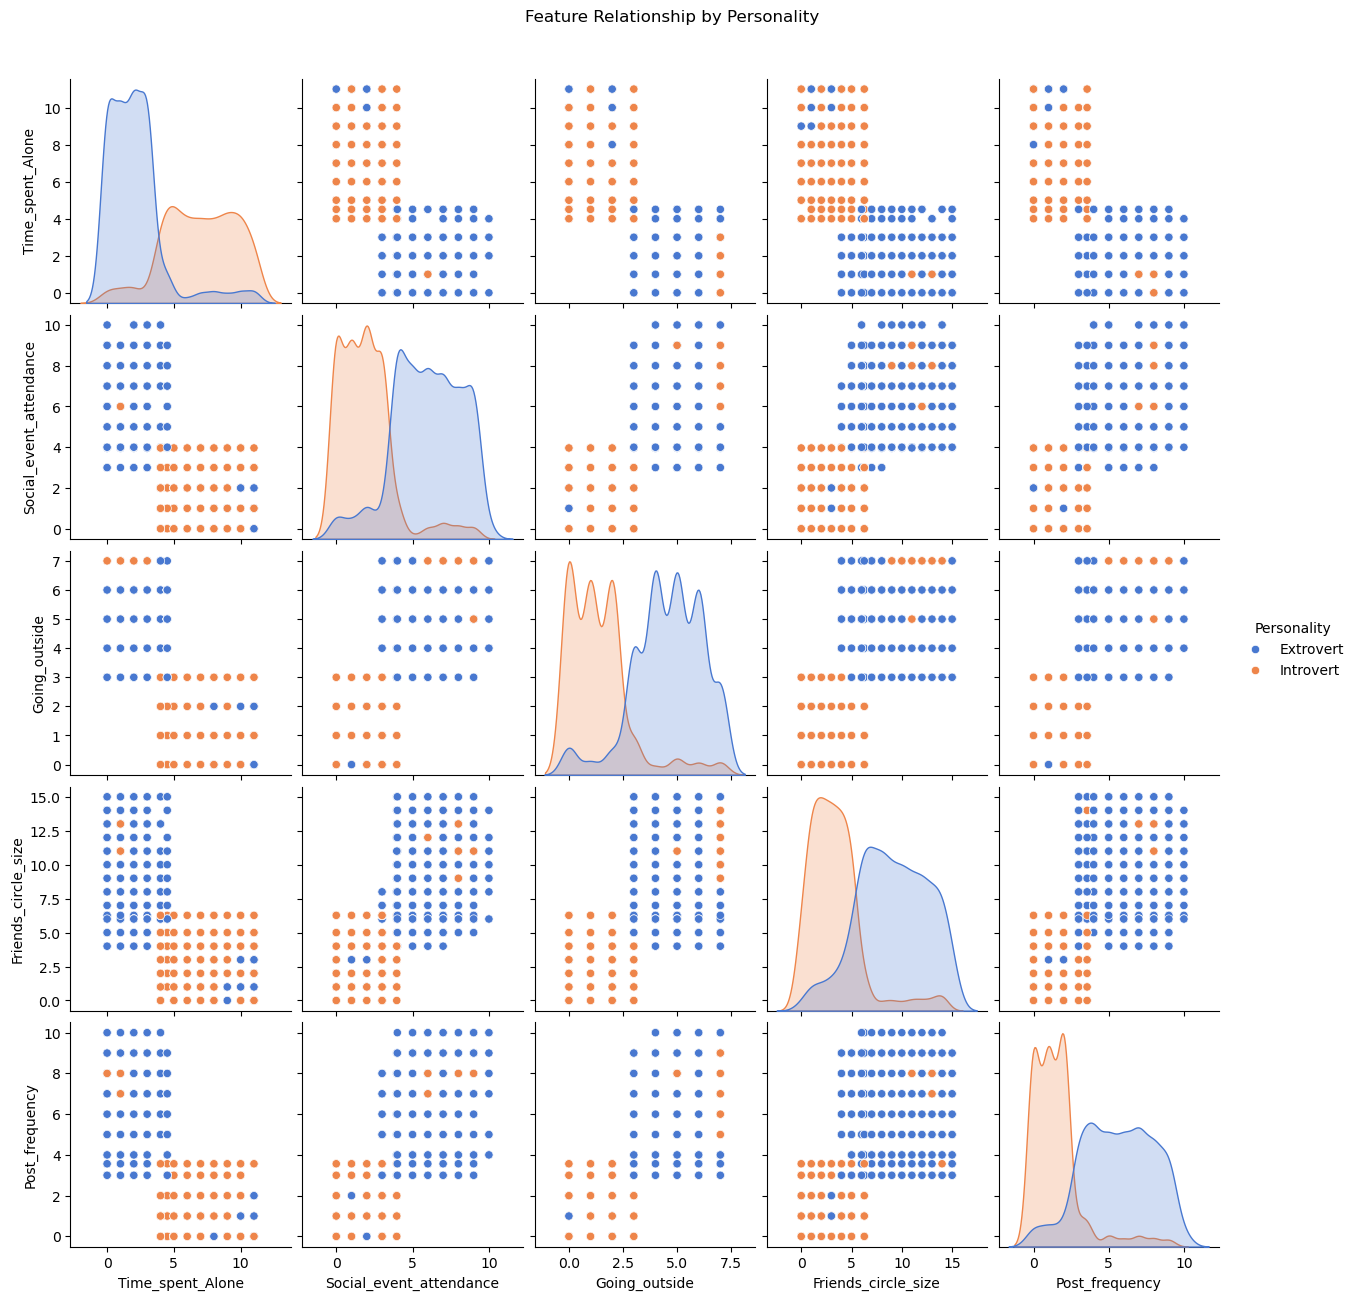

In [831]:
pairplot_data= personality.select_dtypes(include="number")
pairplot_data["Personality"]=personality["Personality"]
sns.pairplot(pairplot_data, hue="Personality", palette="muted")
plt.suptitle('Feature Relationship by Personality', y=1.04)
plt.savefig("pairplot_Feature Relationship by Personality")
plt.show()

. Generate a correlation matrix and plot a heatmap.

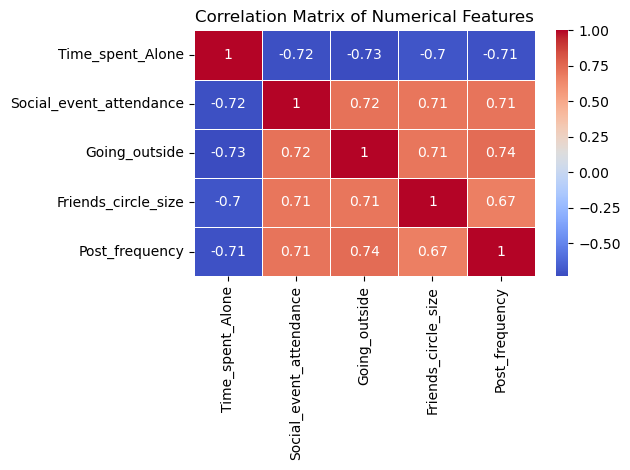

In [832]:
corr_matrix=personality.select_dtypes(include='number').corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.tight_layout()
plt.savefig("Heatmap_Correlation Matrix of Numerical Features")
plt.show()

 Create a scatter plot for the two most correlated features with regression line.

In [833]:
### 2 most correlated features

corr_matrix = personality.select_dtypes(include='number').corr()
corr_pairs = corr_matrix.unstack().sort_values(ascending=False)
corr_pairs = corr_pairs[corr_pairs < 1]
corr_pairs = corr_pairs[~corr_pairs.duplicated()]
top_pair = corr_pairs.idxmax()
print("Most correlated features:", top_pair)


Most correlated features: ('Post_frequency', 'Going_outside')


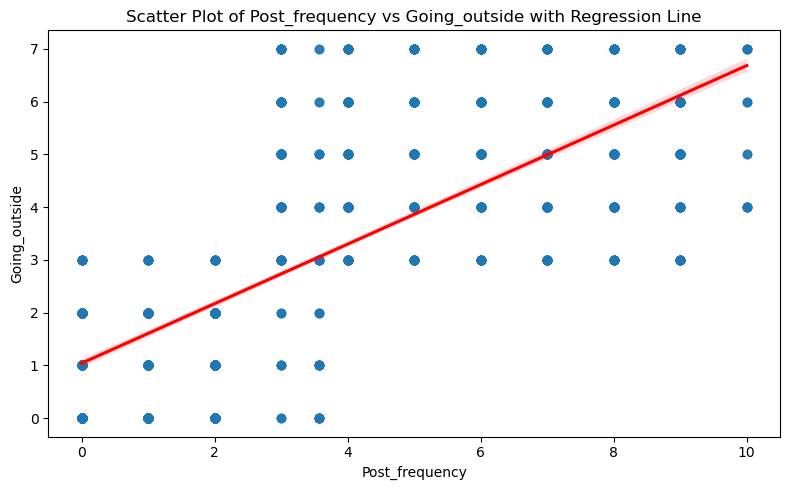

In [834]:
plt.figure(figsize=(8, 5))
sns.regplot(data=personality, x='Post_frequency', y='Going_outside',
            scatter_kws={"alpha": 0.6}, line_kws={"color": "red"})

plt.title('Scatter Plot of Post_frequency vs Going_outside with Regression Line')
plt.tight_layout()
plt.show()

. Plot boxplots of "time_spent_alone" grouped by personality.

C:\Users\TIFF\AppData\Local\Temp\ipykernel_2124\358508702.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=personality, x='Personality', y='Time_spent_Alone', palette='coolwarm')


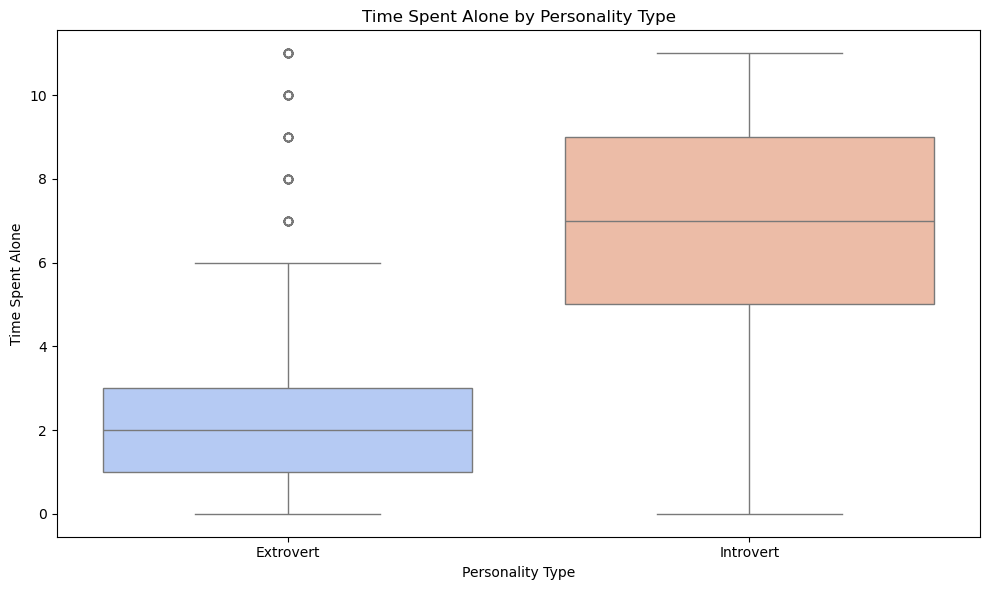

In [835]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=personality, x='Personality', y='Time_spent_Alone', palette='coolwarm')

plt.title('Time Spent Alone by Personality Type')
plt.xlabel('Personality Type')
plt.ylabel('Time Spent Alone')
plt.tight_layout()
plt.show()

Create a violin plot to show the distribution of “Friends_circle_size” by personality type.

C:\Users\TIFF\AppData\Local\Temp\ipykernel_2124\3067492430.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Personality', y='Friends_circle_size', data=personality, palette='muted')


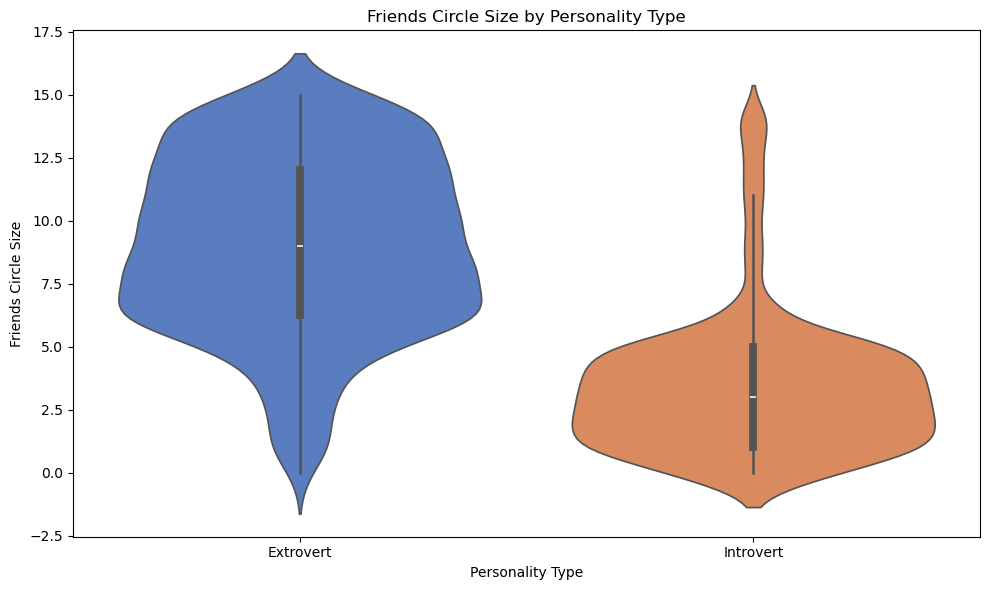

In [836]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Personality', y='Friends_circle_size', data=personality, palette='muted')
plt.title('Friends Circle Size by Personality Type')
plt.xlabel('Personality Type')
plt.ylabel('Friends Circle Size')
plt.tight_layout()
plt.show()

 Compute mean, median, and std per class using groupby.

In [837]:
num_cols = personality.select_dtypes(include='number').columns
stats_by_class = personality.groupby('Personality')[num_cols].agg('mean','median','std')

C:\Users\TIFF\AppData\Local\Temp\ipykernel_2124\21374006.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats_by_class = personality.groupby('Personality')[num_cols].agg('mean','median','std')


In [838]:
stats_by_class

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
Personality,,,,,
Extrovert,2.129863,5.972184,4.592302,9.070388,5.602332
Introvert,6.925714,1.931316,1.400000,3.389416,1.525577


#  GroupBy & Aggregation

 Group by personality and compute the mean of all numeric features.

In [839]:
numeric_cols = personality.select_dtypes(include='number').columns
mean_by_personality = personality.groupby('Personality')[numeric_cols].mean()
mean_by_personality

C:\Users\TIFF\AppData\Local\Temp\ipykernel_2124\1991077203.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_by_personality = personality.groupby('Personality')[numeric_cols].mean()


,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
Personality,,,,,
Extrovert,2.129863,5.972184,4.592302,9.070388,5.602332
Introvert,6.925714,1.931316,1.400000,3.389416,1.525577


In [840]:
grouped_means = personality.groupby('Personality')[numeric_cols].mean()
mean_diff = grouped_means.max() - grouped_means.min()
top_3_diff = mean_diff.sort_values(ascending=False).head(3)
print(top_3_diff)


Friends_circle_size    5.680972
Time_spent_Alone       4.795851
Post_frequency         4.076755
dtype: float64


C:\Users\TIFF\AppData\Local\Temp\ipykernel_2124\4148807339.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_means = personality.groupby('Personality')[numeric_cols].mean()


Save aggregated results as a CSV.

In [841]:
# Save the grouped means to CSV
mean_by_personality.to_csv("mean_by_personality.csv", index=True)

# Feature Scaling

Separate features (X) and target (y).

In [842]:
X = personality.drop("Personality", axis=1)
y = personality["Personality"]

In [843]:
# Split the data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Apply StandardScaler to X: fit on train, transform both.


In [844]:
X_train_numeric = X_train.select_dtypes(include='number')
X_test_numeric = X_test.select_dtypes(include='number')


In [845]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

Use MinMaxScaler, compare the scaled feature ranges.

In [846]:
minmax_scaler = MinMaxScaler()
X_train_numeric = X_train.select_dtypes(include='number')
X_test_numeric = X_test.select_dtypes(include='number')
X_train_minmax = minmax_scaler.fit_transform(X_train_numeric)
X_test_minmax = minmax_scaler.transform(X_test_numeric)


In [847]:

X_train_minmax_df = pd.DataFrame(X_train_minmax, columns=X_train_numeric.columns)
X_test_minmax_df = pd.DataFrame(X_test_minmax, columns=X_test_numeric.columns)


print("Min values (train):")
print(X_train_minmax_df.min())

print("\nMax values (train):")
print(X_train_minmax_df.max())


Min values (train):
Time_spent_Alone           0.0
Social_event_attendance    0.0
Going_outside              0.0
Friends_circle_size        0.0
Post_frequency             0.0
dtype: float64

Max values (train):
Time_spent_Alone           1.0
Social_event_attendance    1.0
Going_outside              1.0
Friends_circle_size        1.0
Post_frequency             1.0
dtype: float64


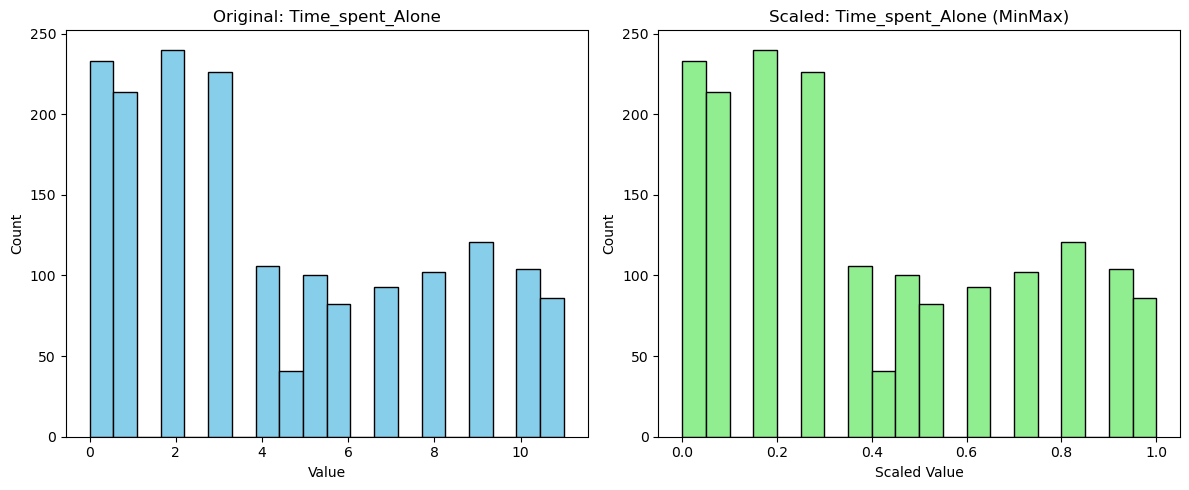

In [848]:

feature = "Time_spent_Alone"
original = X_train[feature]
scaled = X_train_minmax_df[feature]
plt.figure(figsize=(12, 5))

# Original
plt.subplot(1, 2, 1)
plt.hist(original, bins=20, color='skyblue', edgecolor='black')
plt.title(f'Original: {feature}')
plt.xlabel('Value')
plt.ylabel('Count')

# Scaled
plt.subplot(1, 2, 2)
plt.hist(scaled, bins=20, color='lightgreen', edgecolor='black')
plt.title(f'Scaled: {feature} (MinMax)')
plt.xlabel('Scaled Value')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig("Time spent alone")
plt.show()


Section 5: Train/Test Split & Baseline Model (5 questions)

 29. Ensure test set is scaled correctly and has no missing values.

In [849]:
X_train.dtypes

Time_spent_Alone              float64
Stage_fear                   category
Social_event_attendance       float64
Going_outside                 float64
Drained_after_socializing    category
Friends_circle_size           float64
Post_frequency                float64
dtype: object

In [850]:
X_train['Stage_fear'] = X_train['Stage_fear'].map({'Yes': 1, 'No': 0})
X_test['Stage_fear'] = X_test['Stage_fear'].map({'Yes': 1, 'No': 0})

X_train['Drained_after_socializing'] = X_train['Drained_after_socializing'].map({'Yes': 1, 'No': 0})
X_test['Drained_after_socializing'] = X_test['Drained_after_socializing'].map({'Yes': 1, 'No': 0})


In [851]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [852]:
model = LogisticRegression(random_state=42)

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", round(accuracy * 100, 2), "%")


Test Accuracy: 91.47 %


In [853]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:

Classification Report:
              precision    recall  f1-score   support

   Extrovert       0.91      0.94      0.93       421
   Introvert       0.92      0.88      0.90       329

    accuracy                           0.91       750
   macro avg       0.92      0.91      0.91       750
weighted avg       0.91      0.91      0.91       750



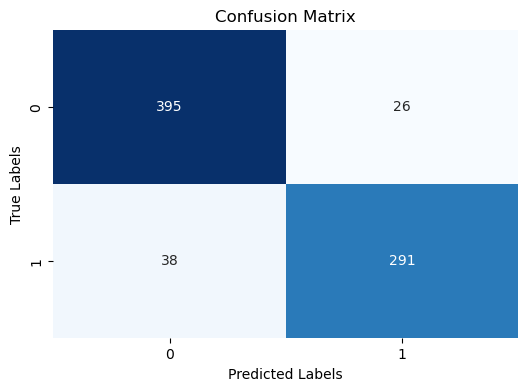

In [854]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


🧠 Is there class imbalance or bias in the model?

When we look at the numbers, we see that the dataset has 421 extroverts and 329 introverts. That’s not a huge gap — so the classes are fairly balanced, which is a good thing.

Now, looking at how the model performs:

It gets most extroverts right (94% recall).

It also does well with introverts, but misses a few more (88% recall).

If we check the confusion matrix, we see:

26 extroverts were wrongly predicted as introverts.

38 introverts were wrongly predicted as extroverts.

So the model is slightly better at identifying extroverts, but it still does a solid job with both. There’s a tiny bit of bias toward extroverts, but nothing too concerning.

The classes are close in size, and the model treats both pretty fairly — it just leans a little more toward extroverts.

# Section 6: Alternative Classification Models (7 questions)

Train a Decision Tree classifier and evaluate.

In [855]:
dt_model = DecisionTreeClassifier(random_state=42)

In [856]:
dt_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [857]:
y_pred_dt = dt_model.predict(X_test_scaled)

In [858]:
print(confusion_matrix(y_test,y_pred_dt))
print(classification_report(y_test,y_pred_dt))

[[371  50]
 [ 64 265]]
              precision    recall  f1-score   support

   Extrovert       0.85      0.88      0.87       421
   Introvert       0.84      0.81      0.82       329

    accuracy                           0.85       750
   macro avg       0.85      0.84      0.84       750
weighted avg       0.85      0.85      0.85       750



35. Train a k-Nearest Neighbors classifier with k=5.

In [859]:
knn = KNeighborsClassifier(n_neighbors=5)



In [860]:
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [861]:
y_pred_knn = knn.predict(X_test_scaled)

In [862]:
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

[[393  28]
 [ 31 298]]
              precision    recall  f1-score   support

   Extrovert       0.93      0.93      0.93       421
   Introvert       0.91      0.91      0.91       329

    accuracy                           0.92       750
   macro avg       0.92      0.92      0.92       750
weighted avg       0.92      0.92      0.92       750



36. Train an SVM with RBF kernel.

In [863]:
svm= SVC(kernel='rbf', random_state=42)

In [864]:
svm.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [865]:
y_pred_svm= svm.predict(X_test_scaled)

In [866]:
print(confusion_matrix(y_test,y_pred_svm))
print(classification_report(y_test,y_pred_svm))

[[395  26]
 [ 30 299]]
              precision    recall  f1-score   support

   Extrovert       0.93      0.94      0.93       421
   Introvert       0.92      0.91      0.91       329

    accuracy                           0.93       750
   macro avg       0.92      0.92      0.92       750
weighted avg       0.93      0.93      0.93       750



Compare test set accuracy for all 3 models.
based on the results the SVM model perfomed the best it had the highest percentage in accuracy therefore i will select svm as the model for this test

 

 38. Plot ROC curves for all models.

In [867]:
# Binarize
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test).ravel()

In [868]:
# Predicted probabilities
y_prob_tree = dt_model.predict_proba(X_test_scaled)[:, 1]
y_prob_knn = knn.predict_proba(X_test_scaled)[:, 1]
y_prob_svm = svm.decision_function(X_test_scaled) 

In [869]:
# ROC curves and AUCs
fpr_tree, tpr_tree, _ = roc_curve(y_test_bin, y_prob_tree)
roc_auc_tree = auc(fpr_tree, tpr_tree)

fpr_knn, tpr_knn, _ = roc_curve(y_test_bin, y_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

fpr_svm, tpr_svm, _ = roc_curve(y_test_bin, y_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

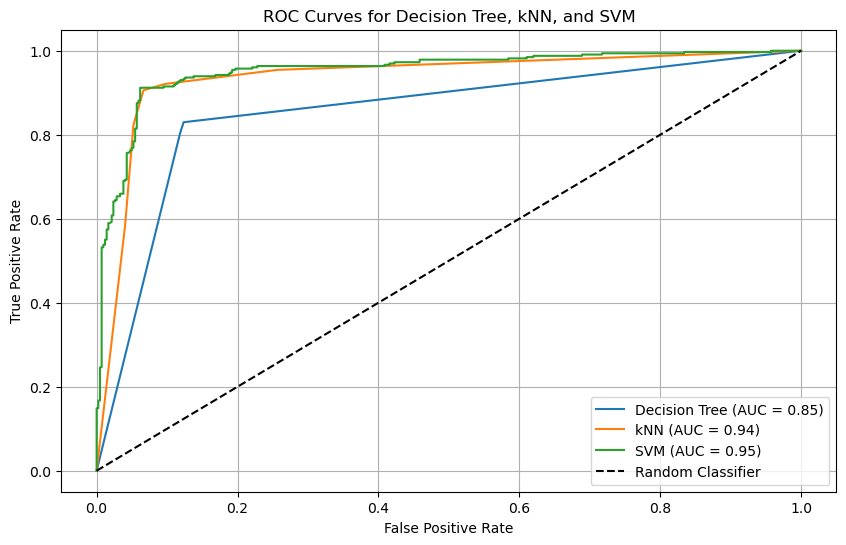

In [870]:
plt.figure(figsize=(10, 6))
plt.plot(fpr_tree, tpr_tree, label=f"Decision Tree (AUC = {roc_auc_tree:.2f})")
plt.plot(fpr_knn, tpr_knn, label=f"kNN (AUC = {roc_auc_knn:.2f})")
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {roc_auc_svm:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Decision Tree, kNN, and SVM")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

. Calculate and compare AUC scores.

In [871]:

auc_tree = roc_auc_score(y_test_bin, y_prob_tree)
auc_knn = roc_auc_score(y_test_bin, y_prob_knn)
auc_svm = roc_auc_score(y_test_bin, y_prob_svm)

print("AUC Scores:")
print(f"Decision Tree: {auc_tree:.3f}")
print(f"k-Nearest Neighbors (k=5): {auc_knn:.3f}")
print(f"Support Vector Machine (RBF kernel): {auc_svm:.3f}")

AUC Scores:
Decision Tree: 0.854
k-Nearest Neighbors (k=5): 0.936
Support Vector Machine (RBF kernel): 0.952


Support Vector Machine (SVM) consistently gave the best results across all evaluation metrics

# Section 7: Hyperparameter Tuning with GridSearchCV (5 questions)

 Define parameter grids for at least two models (e.g., max_depth, C, gamma)

In [872]:
# Decision Tree Classifier
param_grid_dt = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']}


In [873]:
# SVM with RBF Kernel
param_grid_svm = {
    'C': [0.1, 1, 10, 100],            
    'gamma': ['scale', 0.01, 0.1, 1],    
    'kernel': ['rbf'] }

 Run GridSearchCV with 5-fold CV on training data.

In [874]:
dt = DecisionTreeClassifier(random_state=42)
grid_dt = GridSearchCV(estimator=dt,
                       param_grid=param_grid_dt,
                       cv=5,
                       scoring='accuracy',
                       n_jobs=-1)
grid_dt.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [875]:

svm = SVC(probability=True, random_state=42)

grid_svm = GridSearchCV(estimator=svm,
                        param_grid=param_grid_svm,
                        cv=5,
                        scoring='accuracy',
                        n_jobs=-1)
grid_svm.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(probability=True, random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 0.01, 0.1, 1], 'kernel': ['rbf']},
             scoring='accuracy')

In [876]:
# Best parameters and score for Decision Tree
print("Decision Tree - Best Parameters:", grid_dt.best_params_)
print("Decision Tree - Best CV Score:", round(grid_dt.best_score_, 3))

Decision Tree - Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}
Decision Tree - Best CV Score: 0.927


In [877]:
# Best parameters and score for SVM
print("SVM - Best Parameters:", grid_svm.best_params_)
print("SVM - Best CV Score:", round(grid_svm.best_score_, 3))

SVM - Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
SVM - Best CV Score: 0.927


In [878]:

# Predict using the best Decision Tree model
y_pred_dt_best = grid_dt.best_estimator_.predict(X_test_scaled)
print("Best Decision Tree Performance:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt_best))
print("Accuracy:", round(accuracy_score(y_test, y_pred_dt_best), 3))
print(classification_report(y_test, y_pred_dt_best))



Best Decision Tree Performance:
Confusion Matrix:
 [[393  28]
 [ 30 299]]
Accuracy: 0.923
              precision    recall  f1-score   support

   Extrovert       0.93      0.93      0.93       421
   Introvert       0.91      0.91      0.91       329

    accuracy                           0.92       750
   macro avg       0.92      0.92      0.92       750
weighted avg       0.92      0.92      0.92       750



In [879]:
# Predict using the best SVM model
y_pred_svm_best = grid_svm.best_estimator_.predict(X_test_scaled)
print("\nBest SVM Performance:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm_best))
print("Accuracy:", round(accuracy_score(y_test, y_pred_svm_best), 3))
print(classification_report(y_test, y_pred_svm_best))



Best SVM Performance:
Confusion Matrix:
 [[395  26]
 [ 30 299]]
Accuracy: 0.925
              precision    recall  f1-score   support

   Extrovert       0.93      0.94      0.93       421
   Introvert       0.92      0.91      0.91       329

    accuracy                           0.93       750
   macro avg       0.92      0.92      0.92       750
weighted avg       0.93      0.93      0.93       750



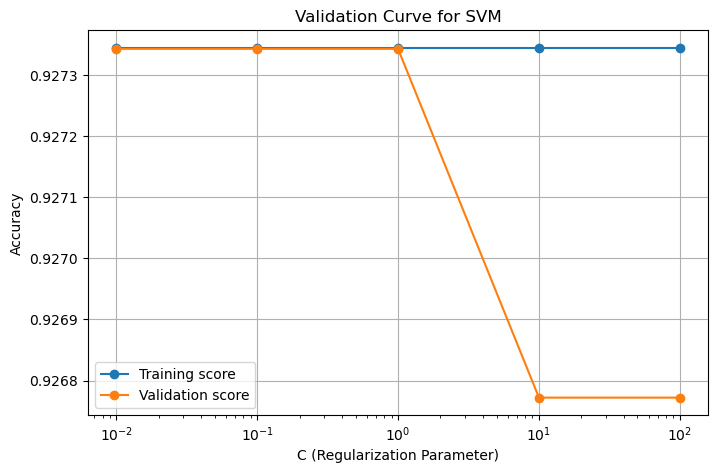

In [880]:
param_range = [0.01, 0.1, 1, 10, 100]
train_scores, test_scores = validation_curve(
    SVC(kernel='rbf', gamma='scale'),
    X_train_scaled, y_train,
    param_name="C",
    param_range=param_range,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8,5))
plt.plot(param_range, train_mean, label="Training score", marker='o')
plt.plot(param_range, test_mean, label="Validation score", marker='o')
plt.xlabel("C (Regularization Parameter)")
plt.ylabel("Accuracy")
plt.title("Validation Curve for SVM")
plt.xscale("log")
plt.legend()
plt.grid(True)
plt.savefig("Validation Curve for SVM")
plt.show()


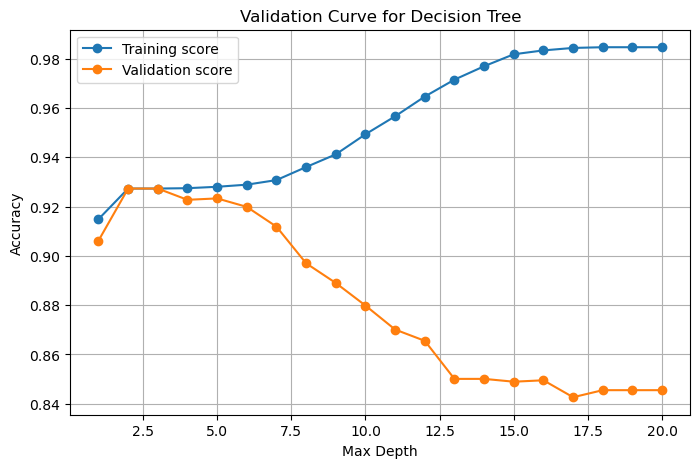

In [881]:
depth_range = range(1, 21)
train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(random_state=42),
    X_train_scaled, y_train,
    param_name="max_depth",
    param_range=depth_range,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8,5))
plt.plot(depth_range, train_mean, label="Training score", marker='o')
plt.plot(depth_range, test_mean, label="Validation score", marker='o')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Validation Curve for Decision Tree")
plt.legend()
plt.grid(True)
plt.savefig("Validation curve for Decision Tree")
plt.show()
